## Tile overlap plots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
surfing_15 = pd.read_excel('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_15_13.xlsx')
surfing_30 = pd.read_excel('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_30_13.xlsx')
surfing_45 = pd.read_excel('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_45_13.xlsx')

In [4]:
surfing_15.columns

Index(['Frame', 'Tile Overlap Ratio (%)', 'video_type', 'num_users'], dtype='object')

/Users/adi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


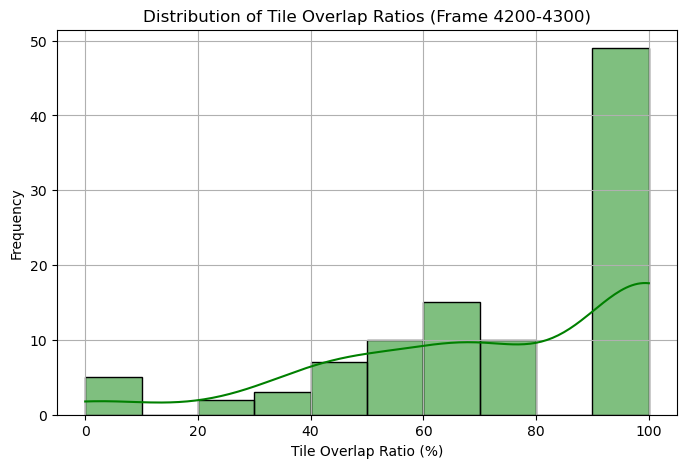

In [5]:
df_results = pd.read_excel('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_45_13.xlsx')
def plot_tile_overlap_distribution(df_results):
    """
    Plots the histogram of tile overlap ratio distribution.
    
    Args:
        df_results (pd.DataFrame): DataFrame containing frame numbers and tile overlap ratios.
        save_path (str): File path to save the histogram.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(df_results["Tile Overlap Ratio (%)"], bins=10, kde=True, color="green")
    
    plt.xlabel("Tile Overlap Ratio (%)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Tile Overlap Ratios (Frame 4200-4300)")
    plt.grid(True)
plot_tile_overlap_distribution(df_results)

/Users/adi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/adi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/adi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, yo

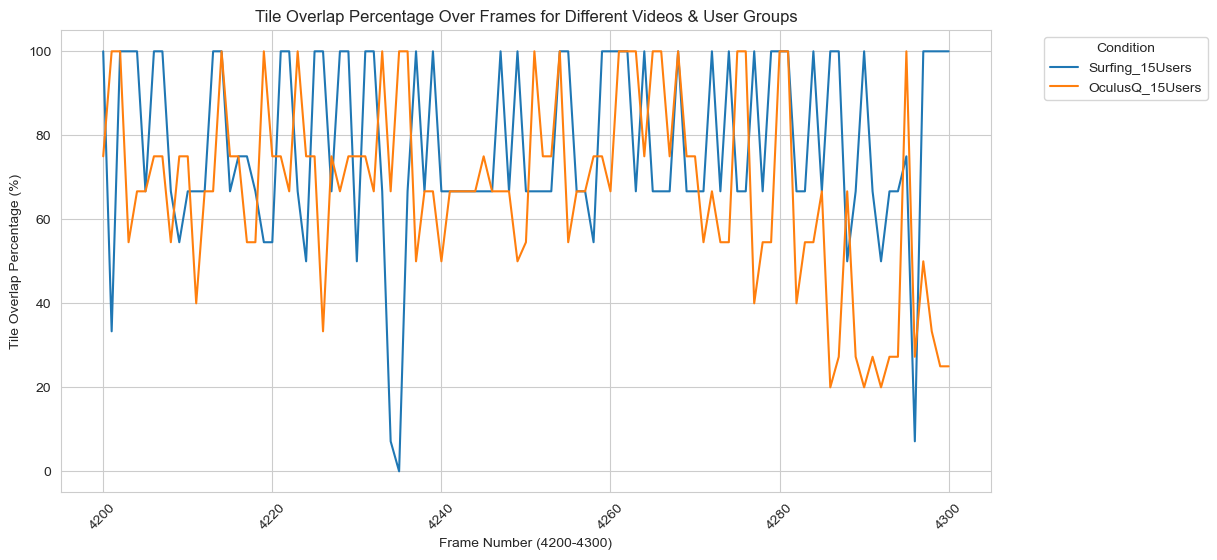

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths for 9 Excel files (adjust paths accordingly)
file_paths = {
    "Surfing_15Users": "/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_15_13.xlsx",
    # "Surfing_30Users": "/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_30_13.xlsx",
    # "Surfing_45Users": "/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_45_13.xlsx"
    "OculusQ_15Users": "/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_15_8.xlsx",
    # "Alien_30Users": "/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_30_1.xlsx",
    # "Alien_45Users": "/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_45_1.xlsx",
}

# Create a single DataFrame for plotting
df_list = []
for label, file in file_paths.items():
    temp_df = pd.read_excel(file)  # Load Excel file
    temp_df['Condition'] = label   # Add a column for video type & user count
    df_list.append(temp_df)

# Concatenate all data into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

# Plot settings
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Line plot
sns.lineplot(data=df, x="Frame", y="Tile Overlap Ratio (%)", hue="Condition")

# Formatting
plt.xlabel("Frame Number (4200-4300)")
plt.ylabel("Tile Overlap Percentage (%)")
plt.title("Tile Overlap Percentage Over Frames for Different Videos & User Groups")
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show plot
plt.show()


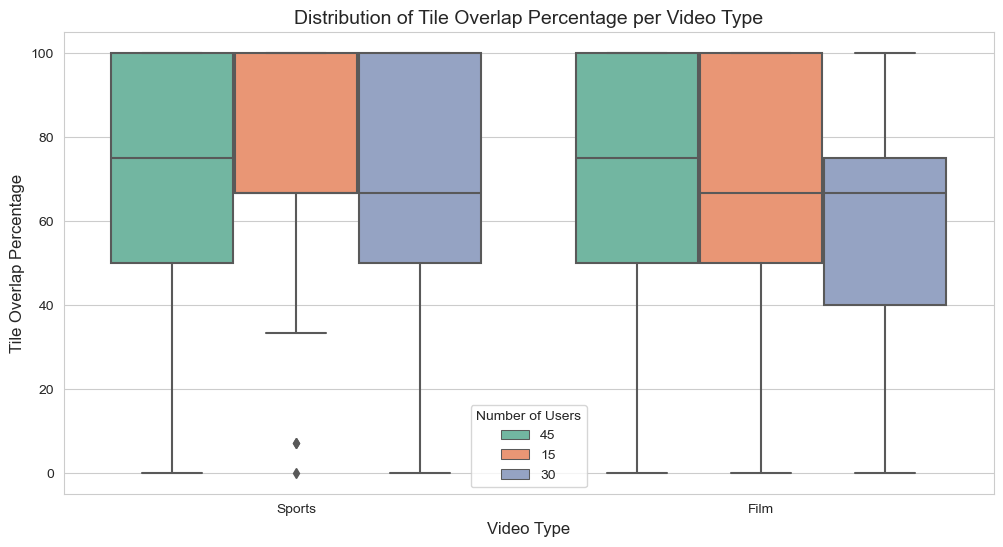

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Define mapping for video types based on IDs
video_type_mapping = {"13": "Sports", "1": "Film"}  # Add other mappings as needed

# Get list of files following pattern
file_paths = glob.glob("overlapratio_*.xlsx")  # Adjust the pattern if files are in a different directory

data_list = []

for file in file_paths:
    df = pd.read_excel(file)
    
    # Extract metadata from filename
    parts = file.replace(".xlsx", "").split("_")  # Split filename
    num_users = parts[1]  # Extract number of users
    video_id = parts[2]    # Extract video type ID
    
    # Convert video ID to video type using mapping
    video_type = video_type_mapping.get(video_id, "Unknown")
    
    # Add metadata columns
    df['video_type'] = video_type
    df['num_users'] = int(num_users)
    
    data_list.append(df)

# Combine all data into a single DataFrame
data = pd.concat(data_list, ignore_index=True)

# Convert num_users to categorical for better boxplot grouping
data['num_users'] = data['num_users'].astype(str)

# Set figure size
plt.figure(figsize=(12, 6))

# Create Box Plot
sns.boxplot(x="video_type", y="Tile Overlap Ratio (%)", hue="num_users", data=data, palette="Set2")

# Titles and labels
plt.title("Distribution of Tile Overlap Percentage per Video Type", fontsize=14)
plt.xlabel("Video Type", fontsize=12)
plt.ylabel("Tile Overlap Percentage", fontsize=12)
plt.legend(title="Number of Users")

# Show plot
plt.show()


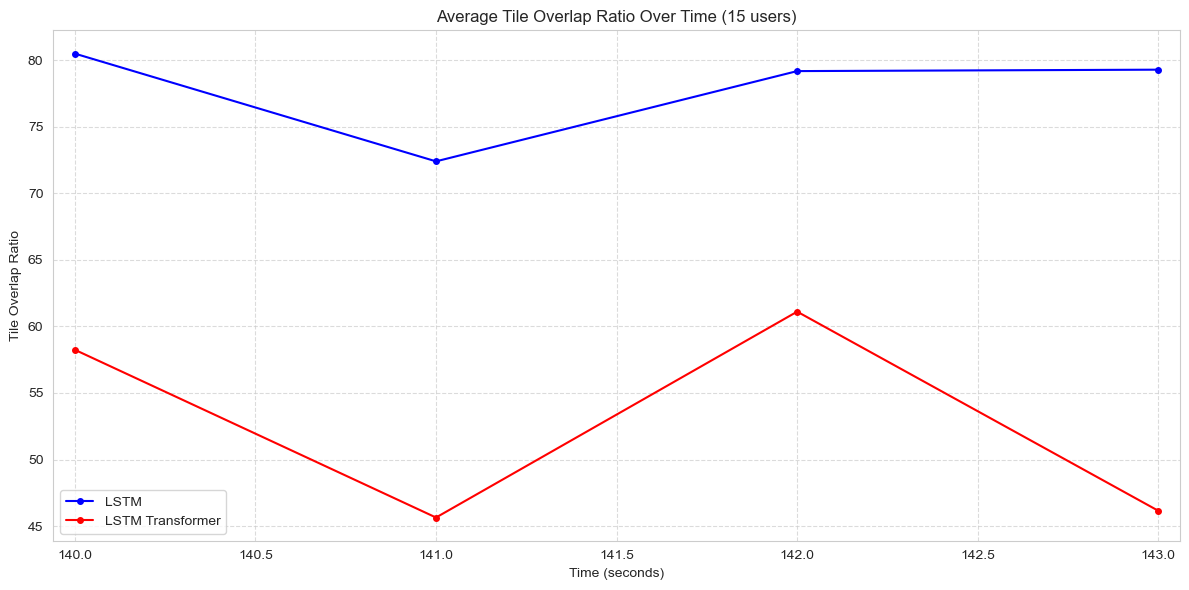


Summary Statistics LSMT model:
Total duration: 3.00 seconds
Average overlap ratio: 77.84%
Maximum overlap ratio: 80.49%
Minimum overlap ratio: 72.40%

Summary Statistics LSMT + Transformer model:
Total duration: 3.00 seconds
Average overlap ratio: 52.79%
Maximum overlap ratio: 61.11%
Minimum overlap ratio: 45.65%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
def process_data(file_path):
    """Helper function to process each Excel file."""
    df = pd.read_excel(file_path)

    df['seconds'] = df['Frame'] / 30
    df['seconds'] = df['seconds'].round()
    # Group data by seconds and calculate mean hit rate
    return df.groupby('seconds')['Tile Overlap Ratio (%)'].mean().reset_index()

df1 = process_data('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_15_13.xlsx')
df2 = process_data('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_TF_model_metrics/overlapratio_15_13.xlsx')


# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(df1['seconds'], df1['Tile Overlap Ratio (%)'], '-o', markersize=4, label="LSTM", color="blue")
plt.plot(df2['seconds'], df2['Tile Overlap Ratio (%)'], '-o', markersize=4, label="LSTM Transformer",color="red")

plt.xlabel('Time (seconds)')
plt.ylabel('Tile Overlap Ratio')
plt.title('Average Tile Overlap Ratio Over Time (15 users)')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize x-axis ticks
# plt.xticks(np.arange(min(df1['seconds'].min(), df2['seconds'].min()), 
#                      max(df1['seconds'].max(), df2['seconds'].max()) + 1, 
#                      1.0))
plt.xticks(rotation=0)

# Add a bit of padding to the plot
plt.margins(x=0.02)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics LSMT model:")
print(f"Total duration: {df1['seconds'].max() - df1['seconds'].min():.2f} seconds")
print(f"Average overlap ratio: {df1['Tile Overlap Ratio (%)'].mean():.2f}%")
print(f"Maximum overlap ratio: {df1['Tile Overlap Ratio (%)'].max():.2f}%")
print(f"Minimum overlap ratio: {df1['Tile Overlap Ratio (%)'].min():.2f}%")

print("\nSummary Statistics LSMT + Transformer model:")
print(f"Total duration: {df2['seconds'].max() - df2['seconds'].min():.2f} seconds")
print(f"Average overlap ratio: {df2['Tile Overlap Ratio (%)'].mean():.2f}%")
print(f"Maximum overlap ratio: {df2['Tile Overlap Ratio (%)'].max():.2f}%")
print(f"Minimum overlap ratio: {df2['Tile Overlap Ratio (%)'].min():.2f}%")

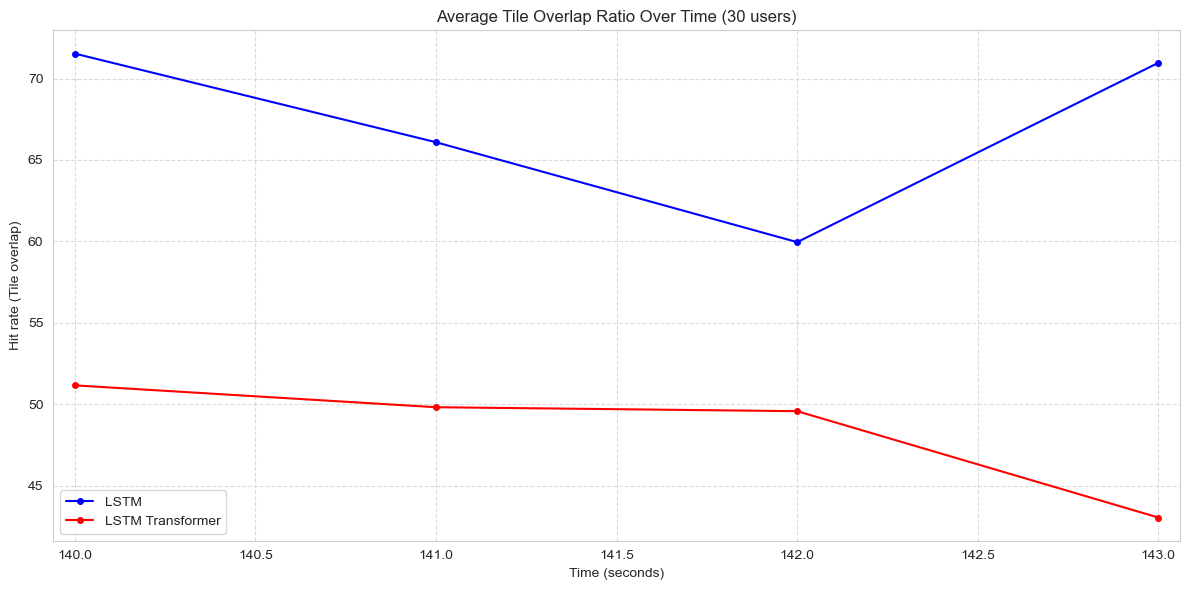


Summary Statistics LSMT model:
Total duration: 3.00 seconds
Average overlap ratio: 67.13%
Maximum overlap ratio: 71.53%
Minimum overlap ratio: 59.96%

Summary Statistics LSMT + Transformer model:
Total duration: 3.00 seconds
Average overlap ratio: 48.41%
Maximum overlap ratio: 51.17%
Minimum overlap ratio: 43.06%


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
def process_data(file_path):
    """Helper function to process each Excel file."""
    df = pd.read_excel(file_path)

    df['seconds'] = df['Frame'] / 30
    df['seconds'] = df['seconds'].round()
    # Group data by seconds and calculate mean hit rate
    return df.groupby('seconds')['Tile Overlap Ratio (%)'].mean().reset_index()

df1 = process_data('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_30_13.xlsx')
df2 = process_data('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_TF_model_metrics/overlapratio_30_13.xlsx')


# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(df1['seconds'], df1['Tile Overlap Ratio (%)'], '-o', markersize=4, label="LSTM", color="blue")
plt.plot(df2['seconds'], df2['Tile Overlap Ratio (%)'], '-o', markersize=4, label="LSTM Transformer",color="red")

plt.xlabel('Time (seconds)')
plt.ylabel('Hit rate (Tile overlap)')
plt.title('Average Tile Overlap Ratio Over Time (30 users)')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize x-axis ticks
# plt.xticks(np.arange(min(df1['seconds'].min(), df2['seconds'].min()), 
#                      max(df1['seconds'].max(), df2['seconds'].max()) + 1, 
#                      1.0))
plt.xticks(rotation=0)

# Add a bit of padding to the plot
plt.margins(x=0.02)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics LSMT model:")
print(f"Total duration: {df1['seconds'].max() - df1['seconds'].min():.2f} seconds")
print(f"Average overlap ratio: {df1['Tile Overlap Ratio (%)'].mean():.2f}%")
print(f"Maximum overlap ratio: {df1['Tile Overlap Ratio (%)'].max():.2f}%")
print(f"Minimum overlap ratio: {df1['Tile Overlap Ratio (%)'].min():.2f}%")

print("\nSummary Statistics LSMT + Transformer model:")
print(f"Total duration: {df2['seconds'].max() - df2['seconds'].min():.2f} seconds")
print(f"Average overlap ratio: {df2['Tile Overlap Ratio (%)'].mean():.2f}%")
print(f"Maximum overlap ratio: {df2['Tile Overlap Ratio (%)'].max():.2f}%")
print(f"Minimum overlap ratio: {df2['Tile Overlap Ratio (%)'].min():.2f}%")

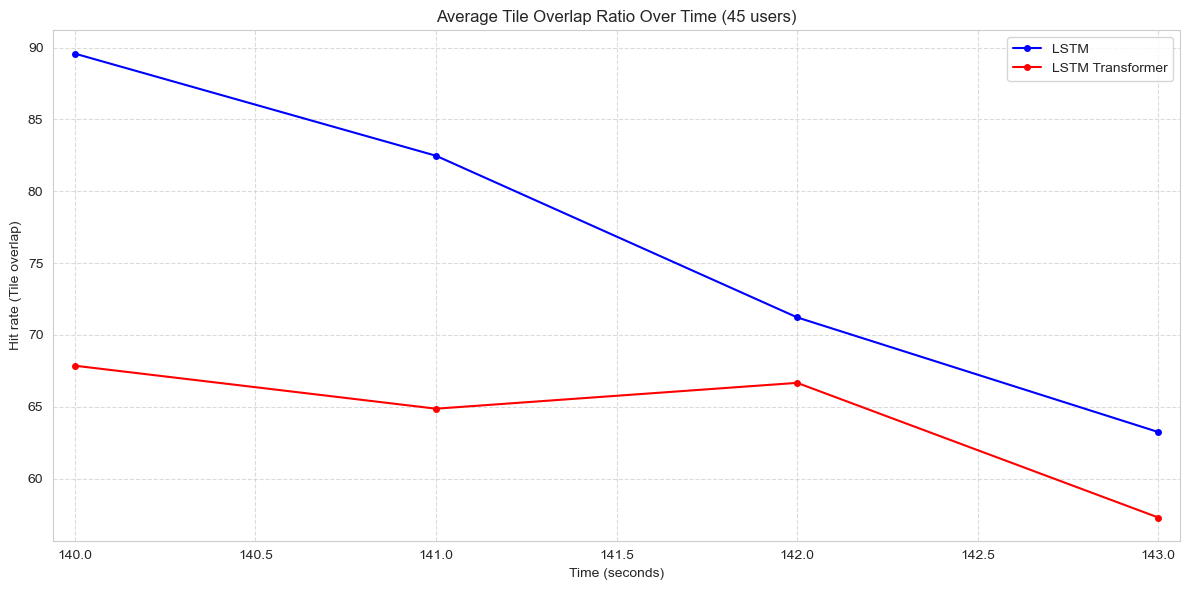


Summary Statistics LSMT model:
Total duration: 3.00 seconds
Average overlap ratio: 76.63%
Maximum overlap ratio: 89.58%
Minimum overlap ratio: 63.24%

Summary Statistics LSMT + Transformer model:
Total duration: 3.00 seconds
Average overlap ratio: 64.16%
Maximum overlap ratio: 67.85%
Minimum overlap ratio: 57.28%


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
def process_data(file_path):
    """Helper function to process each Excel file."""
    df = pd.read_excel(file_path)

    df['seconds'] = df['Frame'] / 30
    df['seconds'] = df['seconds'].round()
    # Group data by seconds and calculate mean hit rate
    return df.groupby('seconds')['Tile Overlap Ratio (%)'].mean().reset_index()

df1 = process_data('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_45_13.xlsx')
df2 = process_data('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_TF_model_metrics/overlapratio_45_13.xlsx')


# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(df1['seconds'], df1['Tile Overlap Ratio (%)'], '-o', markersize=4, label="LSTM", color="blue")
plt.plot(df2['seconds'], df2['Tile Overlap Ratio (%)'], '-o', markersize=4, label="LSTM Transformer",color="red")

plt.xlabel('Time (seconds)')
plt.ylabel('Hit rate (Tile overlap)')
plt.title('Average Tile Overlap Ratio Over Time (45 users)')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize x-axis ticks
# plt.xticks(np.arange(min(df1['seconds'].min(), df2['seconds'].min()), 
#                      max(df1['seconds'].max(), df2['seconds'].max()) + 1, 
#                      1.0))
plt.xticks(rotation=0)

# Add a bit of padding to the plot
plt.margins(x=0.02)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics LSMT model:")
print(f"Total duration: {df1['seconds'].max() - df1['seconds'].min():.2f} seconds")
print(f"Average overlap ratio: {df1['Tile Overlap Ratio (%)'].mean():.2f}%")
print(f"Maximum overlap ratio: {df1['Tile Overlap Ratio (%)'].max():.2f}%")
print(f"Minimum overlap ratio: {df1['Tile Overlap Ratio (%)'].min():.2f}%")

print("\nSummary Statistics LSMT + Transformer model:")
print(f"Total duration: {df2['seconds'].max() - df2['seconds'].min():.2f} seconds")
print(f"Average overlap ratio: {df2['Tile Overlap Ratio (%)'].mean():.2f}%")
print(f"Maximum overlap ratio: {df2['Tile Overlap Ratio (%)'].max():.2f}%")
print(f"Minimum overlap ratio: {df2['Tile Overlap Ratio (%)'].min():.2f}%")

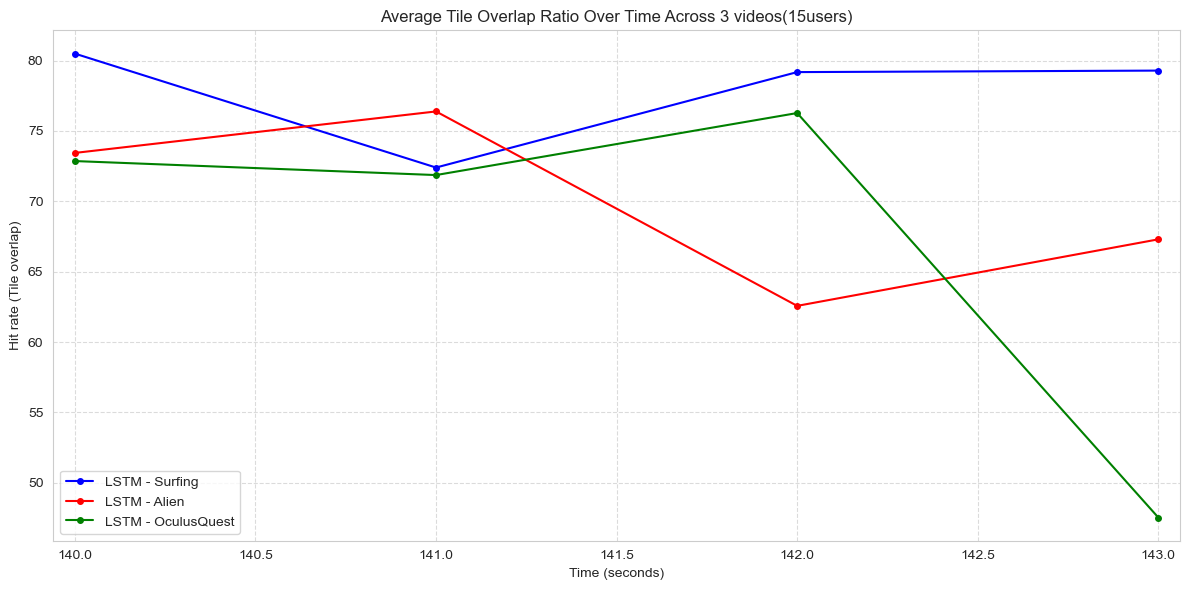


Summary Statistics LSMT model (surfing video):
Total duration: 3.00 seconds
Average overlap ratio: 77.84%
Maximum overlap ratio: 80.49%
Minimum overlap ratio: 72.40%

Summary Statistics LSMT model (Alien video):
Total duration: 3.00 seconds
Average overlap ratio: 69.92%
Maximum overlap ratio: 76.38%
Minimum overlap ratio: 62.57%

Summary Statistics LSMT model (OculusQuest video):
Total duration: 3.00 seconds
Average overlap ratio: 67.13%
Maximum overlap ratio: 76.27%
Minimum overlap ratio: 47.54%


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
def process_data(file_path):
    """Helper function to process each Excel file."""
    df = pd.read_excel(file_path)

    df['seconds'] = df['Frame'] / 30
    df['seconds'] = df['seconds'].round()
    # Group data by seconds and calculate mean hit rate
    return df.groupby('seconds')['Tile Overlap Ratio (%)'].mean().reset_index()

df1 = process_data('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_15_13.xlsx')
df2 = process_data('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_15_1.xlsx')
df3 = process_data('/Users/adi/Documents/University/YEAR 4/FYP thesis/fyp_code/LSTM_model_metrics/overlapratio_15_8.xlsx')


# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(df1['seconds'], df1['Tile Overlap Ratio (%)'], '-o', markersize=4, label="LSTM - Surfing", color="blue")
plt.plot(df2['seconds'], df2['Tile Overlap Ratio (%)'], '-o', markersize=4, label="LSTM - Alien",color="red")
plt.plot(df3['seconds'], df3['Tile Overlap Ratio (%)'], '-o', markersize=4, label="LSTM - OculusQuest",color="green")


plt.xlabel('Time (seconds)')
plt.ylabel('Hit rate (Tile overlap)')
plt.title('Average Tile Overlap Ratio Over Time Across 3 videos(15users)')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize x-axis ticks
# plt.xticks(np.arange(min(df1['seconds'].min(), df2['seconds'].min()), 
#                      max(df1['seconds'].max(), df2['seconds'].max()) + 1, 
#                      1.0))
plt.xticks(rotation=0)

# Add a bit of padding to the plot
plt.margins(x=0.02)
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics LSMT model (surfing video):")
print(f"Total duration: {df1['seconds'].max() - df1['seconds'].min():.2f} seconds")
print(f"Average overlap ratio: {df1['Tile Overlap Ratio (%)'].mean():.2f}%")
print(f"Maximum overlap ratio: {df1['Tile Overlap Ratio (%)'].max():.2f}%")
print(f"Minimum overlap ratio: {df1['Tile Overlap Ratio (%)'].min():.2f}%")

print("\nSummary Statistics LSMT model (Alien video):")
print(f"Total duration: {df2['seconds'].max() - df2['seconds'].min():.2f} seconds")
print(f"Average overlap ratio: {df2['Tile Overlap Ratio (%)'].mean():.2f}%")
print(f"Maximum overlap ratio: {df2['Tile Overlap Ratio (%)'].max():.2f}%")
print(f"Minimum overlap ratio: {df2['Tile Overlap Ratio (%)'].min():.2f}%")

print("\nSummary Statistics LSMT model (OculusQuest video):")
print(f"Total duration: {df3['seconds'].max() - df2['seconds'].min():.2f} seconds")
print(f"Average overlap ratio: {df3['Tile Overlap Ratio (%)'].mean():.2f}%")
print(f"Maximum overlap ratio: {df3['Tile Overlap Ratio (%)'].max():.2f}%")
print(f"Minimum overlap ratio: {df3['Tile Overlap Ratio (%)'].min():.2f}%")

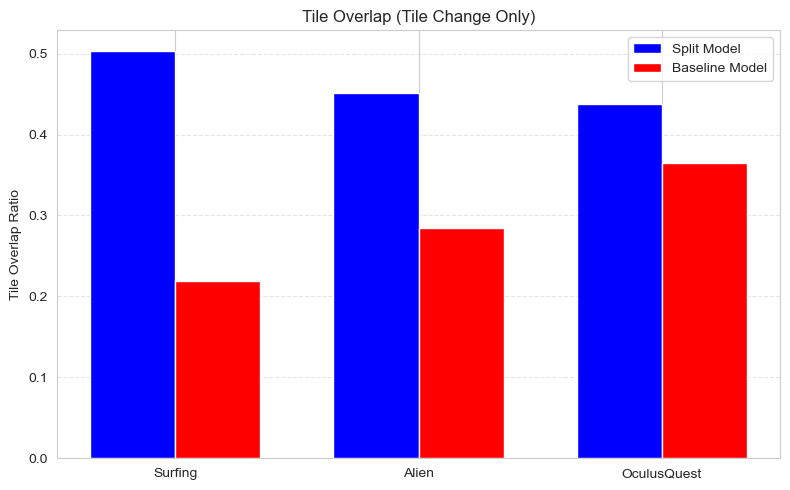

In [37]:
import matplotlib.pyplot as plt
import numpy as np

videos = ['Surfing', 'Alien', 'OculusQuest']
split_overlap = [0.5036, 0.4508, 0.4378]
baseline_overlap = [0.2185, 0.2846, 0.3647]

x = np.arange(len(videos))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, split_overlap, width, label='Split Model', color='blue')
plt.bar(x + width/2, baseline_overlap, width, label='Baseline Model', color='red')
plt.ylabel('Tile Overlap Ratio')
plt.title('Tile Overlap (Tile Change Only)')
plt.xticks(x, videos)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('TileOverlap(tile_change).png')
plt.show()




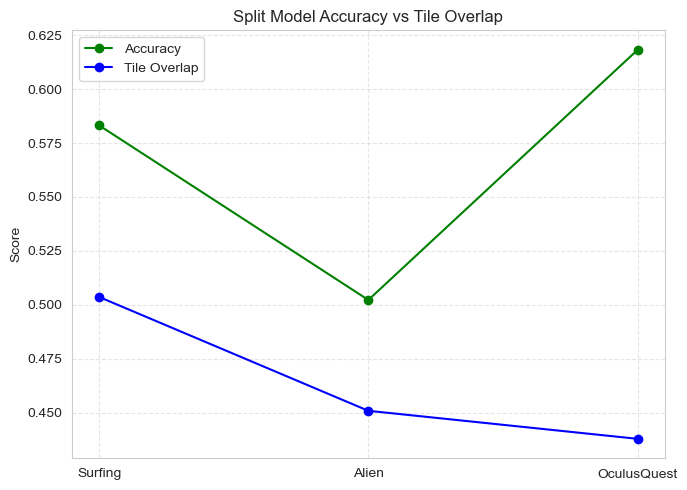

In [55]:
split_accuracy = [0.5832, 0.5022, 0.6182]
split_tile_overlap = [0.5036, 0.4508, 0.4378]

plt.figure(figsize=(7, 5))
plt.plot(videos, split_accuracy, marker='o', label='Accuracy', color='green')
plt.plot(videos, split_tile_overlap, marker='o', label='Tile Overlap', color='blue')
plt.ylabel('Score')
plt.title('Split Model Accuracy vs Tile Overlap')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('Splitmodel_acuuracy_TO.png')
plt.show()


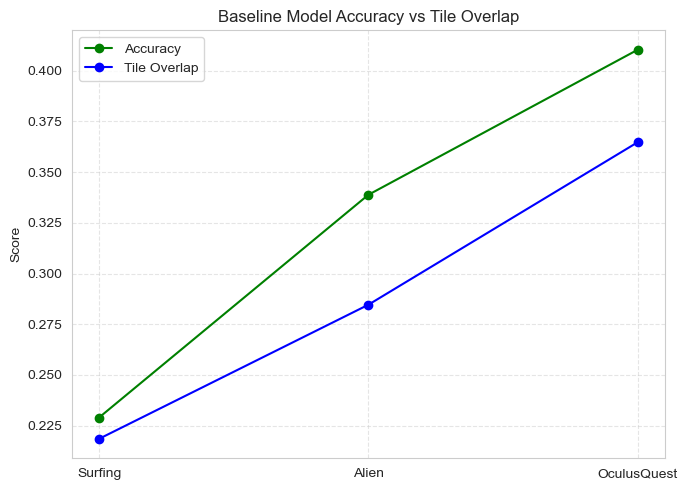

In [53]:
split_accuracy = [0.229, 0.3388, 0.4103]
split_tile_overlap = [0.2185, 0.2846, 0.3647]

plt.figure(figsize=(7, 5))
plt.plot(videos, split_accuracy, marker='o', label='Accuracy', color='green')
plt.plot(videos, split_tile_overlap, marker='o', label='Tile Overlap', color='blue')
plt.ylabel('Score')
plt.title('Baseline Model Accuracy vs Tile Overlap')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

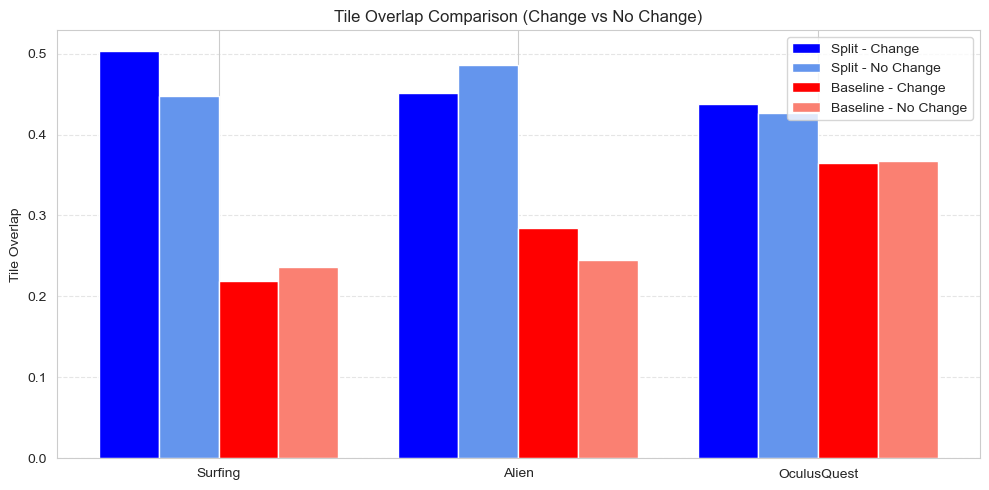

In [49]:
split_change = [0.5036, 0.4508, 0.4378]
baseline_change = [0.2185, 0.2846, 0.3647]
split_nochange = [0.4476, 0.486, 0.4269]
baseline_nochange = [0.2363, 0.2444, 0.3668]

x = np.arange(len(videos))
width = 0.2

plt.figure(figsize=(10, 5))
plt.bar(x - 1.5*width, split_change, width, label='Split - Change', color='blue')
plt.bar(x - 0.5*width, split_nochange, width, label='Split - No Change', color='cornflowerblue')
plt.bar(x + 0.5*width, baseline_change, width, label='Baseline - Change', color='red')
plt.bar(x + 1.5*width, baseline_nochange, width, label='Baseline - No Change', color='salmon')
plt.xticks(x, videos)
plt.ylabel('Tile Overlap')
plt.title('Tile Overlap Comparison (Change vs No Change)')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('TileOverlap(changeVsNochange).png')
plt.show()
